이름: 김수현
    
학번: 20183911 
    
    

In [1]:
import numpy as np

# Part 1: Clustering


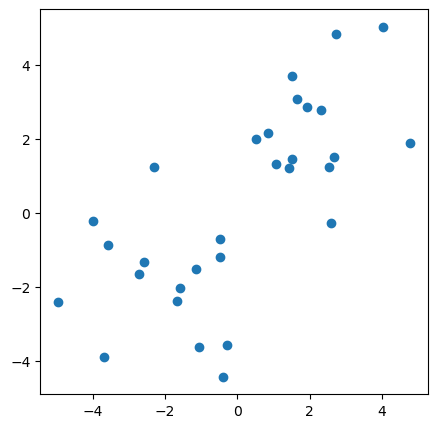

In [74]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(13) #13
batch_size = 45
centers = [[-2.5, -2], [2, 2]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=30, centers=centers, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1])

In [3]:
X.shape   # 차원이 2인 샘플 30개

(30, 2)

In [4]:
np.random.randn(2,3)

array([[-0.48188622,  1.32857008, -0.72342323],
       [-1.88585702,  0.35592168, -0.20608069]])

## 과제를 위한 유용한 코딩 기법 소개

In [5]:
x_test = np.random.randn(5,3)
x_test

array([[-0.6596602 , -1.02169239,  0.20832549],
       [-1.44437362,  0.77549186, -0.27568055],
       [-0.56864481,  0.15605188, -1.31044578],
       [-0.14344887,  1.18408462, -0.33017653],
       [ 0.19330962, -1.53703839, -0.03251265]])

In [6]:
ci = np.array([0, 1, 0, 1, 1])   # 각 샘플의 클러스터를 가정

In [7]:
centoid_test = np.random.randn(2,3)

In [8]:
centoid_test

array([[-1.58921087, -1.31073645,  0.57314113],
       [ 0.06987591, -0.16156045,  1.15016999]])

In [9]:
x_test

array([[-0.6596602 , -1.02169239,  0.20832549],
       [-1.44437362,  0.77549186, -0.27568055],
       [-0.56864481,  0.15605188, -1.31044578],
       [-0.14344887,  1.18408462, -0.33017653],
       [ 0.19330962, -1.53703839, -0.03251265]])

In [10]:
ci

array([0, 1, 0, 1, 1])

In [11]:
centoid_test

array([[-1.58921087, -1.31073645,  0.57314113],
       [ 0.06987591, -0.16156045,  1.15016999]])

* `x_test` 중에서 `ci`가 `1`인 sample만 골라내기

In [12]:
x_test[ci==1, :]

array([[-1.44437362,  0.77549186, -0.27568055],
       [-0.14344887,  1.18408462, -0.33017653],
       [ 0.19330962, -1.53703839, -0.03251265]])

In [13]:
np.mean(x_test[ci==1, :], axis=1)

array([-0.3148541 ,  0.23681974, -0.45874714])

* x_test의 data 별로 centroid 값으로 대체한 행렬 만들기

In [14]:
x_new = centoid_test[ci,:]

In [15]:
x_new

array([[-1.58921087, -1.31073645,  0.57314113],
       [ 0.06987591, -0.16156045,  1.15016999],
       [-1.58921087, -1.31073645,  0.57314113],
       [ 0.06987591, -0.16156045,  1.15016999],
       [ 0.06987591, -0.16156045,  1.15016999]])

* `x_test` sample 별로 최소 거리 centroid index 찾기

In [16]:
dist2 = np.zeros((x_test.shape[0], centoid_test.shape[0]))
for i, c in enumerate(centoid_test):   # 인덱스와 실제 값을 돌려줌
    dist2[:, i] = np.mean((x_test - c)**2, axis = 1 )     

In [17]:
dist2

array([[0.36023379, 0.71970698],
       [1.69794155, 1.73468948],
       [2.24697424, 2.18773875],
       [3.04344758, 1.34923132],
       [1.19846945, 1.10197122]])

* 최소거리 cluster index 찾기

In [18]:
np.argmin(dist2, axis=1)

array([0, 0, 1, 1, 1], dtype=int64)

# Problem 1
- `init_centroid(X, K)` 함수를 완성하세요
    - `input`: `X`, `K`
    - `return`: `centroids` 행렬을 return하며, `K`개의 data를 random하게 (K, n) 행렬
    - 즉, `centroids` 행렬은 각 row가 $\mu_k$ 가 된다

In [19]:
# initialize centroids
def init_centroid(X, K):
    centroids = X[:K]   # 다양한 차원의 행렬을 적용할 수 있도록 X의 원소 중 K개로 초기화 합니다.
    for k in range(K):
        n = np.random.randint(X.shape[0])   # 0에서 X의 sample수 사이 중 랜덤한 값을 뽑아줍니다.
        centroids[k] = X[n]                 # 위에서 뽑은 값을 centroid의 초기값으로 설정합니다.
    return centroids

## Problem 2

- `findClosestCentroids(X, centroids)`
    - `input`: `X`, `centroids`
    - return: Data별로 centroid index를 저장한 vector, 즉 $c^{(i)}$
    - return 하는 벡터의 구조는 (m,) shape로 return
   

In [20]:
def findClosestCentroids(X, centroids):
    dist = np.zeros((X.shape[0], centroids.shape[0]))   # 행은 X의 sample의 수, 열은 K만큼 dist 행렬을 만듭니다.
    for i, c in enumerate(centroids):                   
        dist[:, i] = np.mean((X - c)**2, axis = 1)      # 실제 X와 K개의 centroid의 오차 평균(거리)을 구하여 저장합니다.
    return np.argmin(dist, axis=1)                      # 각 샘플당 K개 저장된 값 중에서 작은 값의 인덱스를 ci로 저장합니다.

## Problem 3

- `computeCentroids(X, ci, K)`
    - `input`: `X`, `ci`, `K`,  여기서 `ci`는 $c^{(i)}$를 저장하고 있는 벡터
    - return: 새로 업데이트된 centroid 값 (각 cluster별 평균값)
    \begin{align}
    \mu_k := \frac{1}{|\mathcal{C}_k|}\sum_{i\in\mathcal{C}_k} x^{(i)}
    \end{align}

In [79]:
def computeCentroids(X, ci, K):
    for k in range(K):
        centroids[k] = np.mean(X[ci==k, :], axis=0)   # ci가 같은 값들끼리 모아 열끼리의 평균을 구하여 centroid를 업데이트 합니다.
    return centroids

## Problem 4

- `cost(X, ci, centroids)`
    - `input`: `X`, `ci`, `K`, `centroids`
    - return: cost
    \begin{align}
    J(c,\mu) = \frac{1}{m}\sum_{i=1}^m \|x^{(i)}-\mu_{c^{(i)}}\|^2
    \end{align}

In [22]:
def cost(X, ci, centroids):
    return np.mean((X - centroids[ci])**2)   

## Problem 5
학습을 10번 진행하여 최적 centroid, mapping, cost를 구하세요

- 학습한 centroid는 `centroids`라는 변수에 저장하세요
- data 별 cluster 인덱스는 `ci`라는 변수에 저장하세요
- Cost는 `loss`라는 변수에 epoch별로 저장하세요

In [73]:
epoch = 10
K=2

centroids = init_centroid(X, K)
loss = np.zeros(epoch)

for e in np.arange(epoch):
    ci = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, ci, K)
    loss[e] = cost(X, ci, centroids)

In [24]:
centroids

array([[-1.94990005, -1.98026926],
       [ 2.00951158,  2.12070506]])

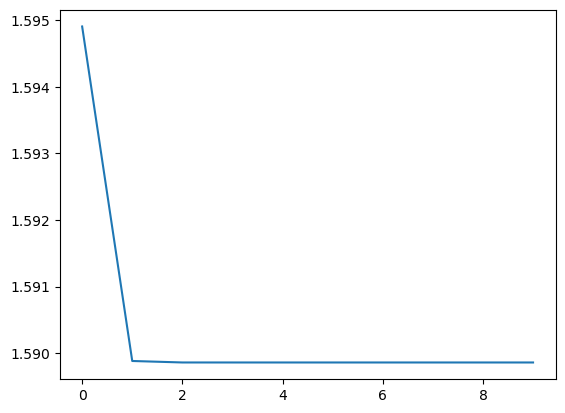

In [25]:
plt.plot(loss)

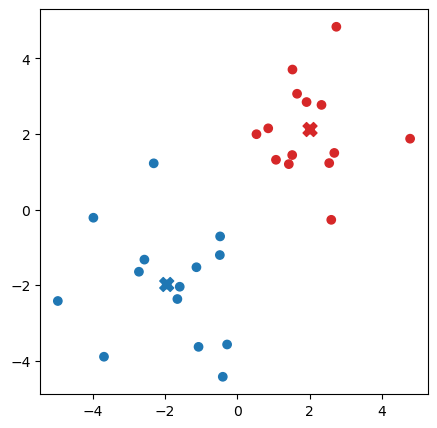

In [26]:
plt.rcParams["figure.figsize"] = (5,5)
colormap = np.array(['tab:blue', 'tab:red'])
plt.scatter(X[:,0], X[:,1], c = colormap[ci.astype(int)])
plt.scatter(centroids[:,0], centroids[:,1], c = colormap, marker='X', s = 100)

# Part 2: Image compression

In [27]:
from PIL import Image

img = Image.open( 'bird_small.png' )
img.load()
data = np.asarray( img)

In [28]:
data.shape

(128, 128, 3)

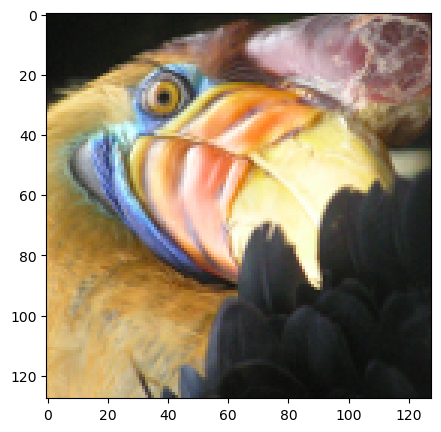

In [29]:
plt.imshow(data)

In [30]:
X_image = data.reshape(-1,3)

In [31]:
X_image.shape

(16384, 3)

In [32]:
X_image = X_image/255

In [33]:
X_image

array([[0.04705882, 0.05490196, 0.04705882],
       [0.04313725, 0.05490196, 0.03529412],
       [0.04313725, 0.05882353, 0.03921569],
       ...,
       [0.05882353, 0.07058824, 0.0627451 ],
       [0.0627451 , 0.06666667, 0.06666667],
       [0.05882353, 0.0745098 , 0.0745098 ]])

# Problem 6

- K = 15
- epoch = 50
- Centroid (`centroids`)와 mapping (`ci`)를 찾으세요
- Distortion (cost) 값을 `loss`라는 변수에 epoch 별로 저장하세요

In [61]:
epoch = 50
K= 10

centroids = init_centroid(X_image, K)
loss = np.zeros(epoch)

for e in np.arange(epoch):
    ci = findClosestCentroids(X_image, centroids)
    centroids = computeCentroids(X_image, ci, K)
    loss[e] = cost(X_image, ci, centroids)

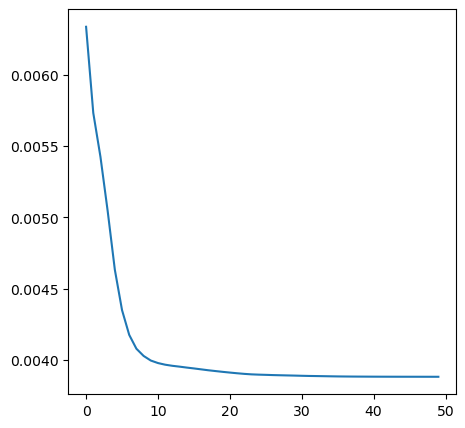

In [62]:
plt.plot(loss)

In [63]:
ci = findClosestCentroids(X_image, centroids)


## Problem 7

`X_compress`를 만드세요

각 (3-채널) pixel을 가장 가까운 centroid 값으로 대체하는 `X_compress`를 저장하세요

In [66]:
# 답 작성
X_compress = centroids[ci,:]

In [67]:
X_compress = X_compress.reshape(128,128,3)
 

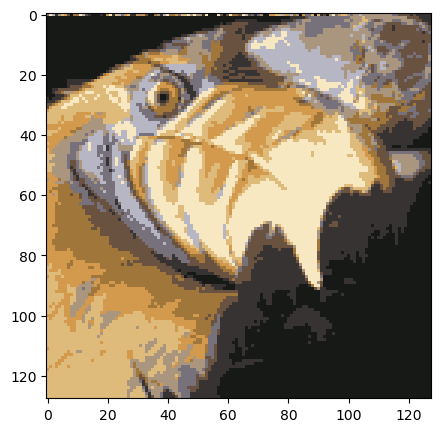

In [68]:
import matplotlib
plt.imshow(X_compress)

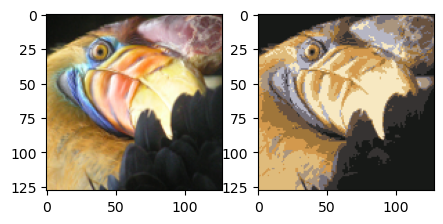

In [69]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(data)
axarr[1].imshow(X_compress)